/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Parameters: min_sup=0.1, min_conf=0.95, min_lift=4, Rules: 24
Combinations that resulted in 20 to 50 rules:
(0.1, 0.95, 4, 24)


/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


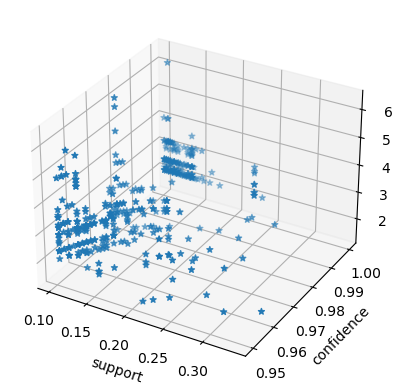

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth,apriori,association_rules


#Input Dateset
# org_df = pd.read_csv("amr_horse_ds.csv")
org_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/amr_horse_ds.csv")
org_df= pd.get_dummies(org_df.loc[:,org_df.columns!='Age'])

# Parameters to iterate over
min_sups = [0.05, 0.1, 0.4]
min_confs = [0.70, 0.85, 0.95]
min_lifts = [1.1, 1.5, 4]

# Store the result
results = []

# Iterate over all combinations
for min_sup in min_sups:
    frequent_patterns_df = fpgrowth(org_df, min_support=min_sup, use_colnames=True)
    for min_conf in min_confs:
        for min_lift in min_lifts:
            rules_df = association_rules(frequent_patterns_df, metric="confidence", min_threshold=min_conf)
            high_lift_rules_df = rules_df[rules_df['lift'] > min_lift]
            
            # Check if the number of rules is within the desired range
            num_rules = high_lift_rules_df.shape[0]
            if 20 <= num_rules <= 50:
                print(f"Parameters: min_sup={min_sup}, min_conf={min_conf}, min_lift={min_lift}, Rules: {num_rules}")
                results.append((min_sup, min_conf, min_lift, num_rules))
                # Optionally save rules that meet criteria
                high_lift_rules_df.to_csv(f'arules_{min_sup}_{min_conf}_{min_lift}.csv')

# Print all combinations that met the criteria
print("Combinations that resulted in 20 to 50 rules:")
for result in results:
    print(result)

#Extract Association Rules
frequent_patterns_df = fpgrowth(org_df, min_support=0.1,use_colnames=True)
rules_df = association_rules(frequent_patterns_df, metric = "confidence", min_threshold = 0.95)
high_lift_rules_df = rules_df[rules_df['lift'] > 4]

#Save Association Rules
# high_lift_rules_df.to_csv('arules.csv')

#Visualize Association Rules
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(rules_df['support'], rules_df['confidence'], rules_df['lift'], marker="*")
ax.set_xlabel('support')
ax.set_ylabel('confidence')
ax.set_zlabel('lift')
plt.show()